
# Machine Learning & AI: Unsupervised Learning

-----------


<br><br>

<h3><div style="text-align: center"> 한양대학교 에리카, AI Lab <br><br>
이상근 </div> </h3>


In [2]:
from IPython.display import Image
%matplotlib inline

# Grouping objects by similarity using k-means

find groups of similar objects, objects that are more related to each other than to objects in other groups.

 - documents, music, and movies by different topics
 - customers with common purchase behaviors (as a basis for recommendation engines)
 

## Clustering methods
- Prototype-based clustering: each cluster is represented by a prototype
  - centroid (average)
  - medoid (the most representative or most frequently occurring point)
- Hierarchical clustering
- Density-based clustering

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

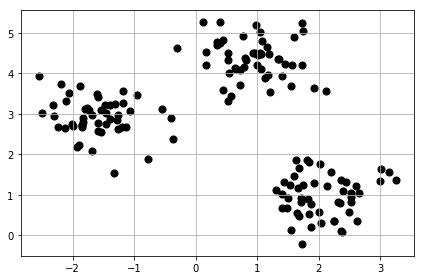

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='black', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

#### K-means algorithm:
1. Randomly pick k centroids from the sample points as initial cluster centers.
2. Assign each sample to the nearest centroid μ(j), j∈{1,...,k}.
3. Move the centroids to the center of the samples that were assigned to it.
4. Repeat the steps 2 and 3 until the cluster assignment do not change or a user-defined tolerance or a maximum number of iterations is reached.

http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html

K-means is an iterative approach for minimizing the **within-cluster sum of squared errors (SSE)**, which is sometimes also called **cluster inertia**:

$$
   SSE = \sum_{i=1}^n \sum_{j=1}^m w(i,j) \| x(i)−μ(j) \|_2^2
$$

Here, μ (j) is the representative point (centroid) for cluster j, and w(i , j ) = 1 if the sample
x(i) is in cluster j; w(i, j) = 0 otherwise.

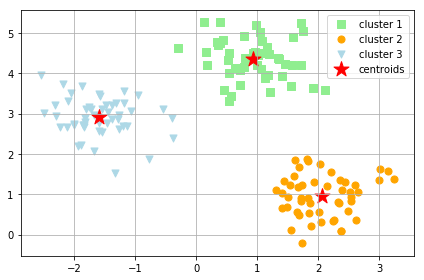

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,   # need to specify the number of clusters
            init='random', 
            n_init=10,      # no. instances with random init
            max_iter=300,
            tol=1e-04, 
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Organizing clusters as a hierarchical tree

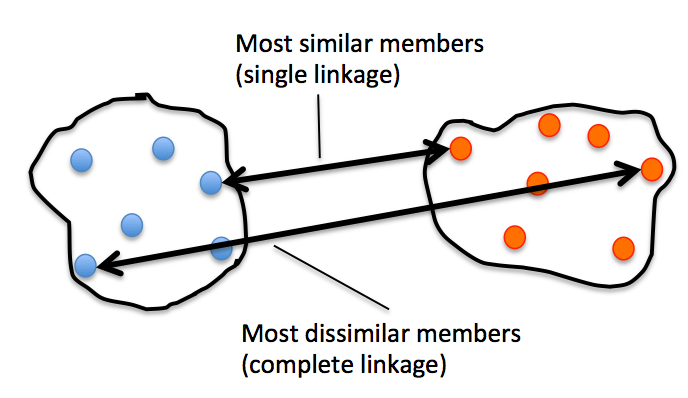

In [7]:
from IPython.display import Image
Image(filename='./images/11_05.png', width=500) 

In [8]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


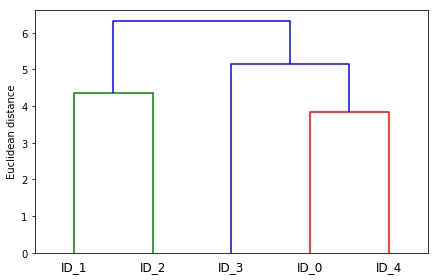

In [9]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(df.values, method= 'average', metric='euclidean') #single, complete, average, centroid, ward

from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

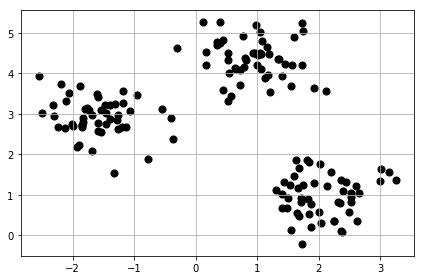

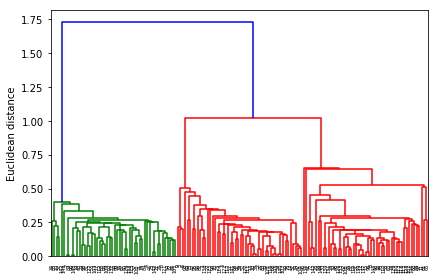

In [10]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)
plt.scatter(X[:, 0], X[:, 1], c='black', marker='o', s=50)
plt.grid()
plt.tight_layout()
plt.show()

from scipy.cluster.hierarchy import linkage

cl = linkage(X, method='single', metric='euclidean') #single, complete, average, centroid, ward

from scipy.cluster.hierarchy import dendrogram

dendr = dendrogram(cl)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

## Attaching dendrograms to a heat map

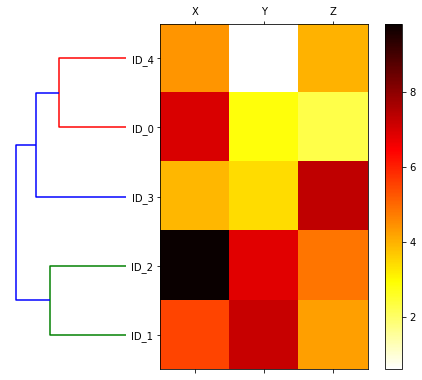

In [11]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

## Applying agglomerative clustering via scikit-learn

In [12]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')  # average, ward
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 1]


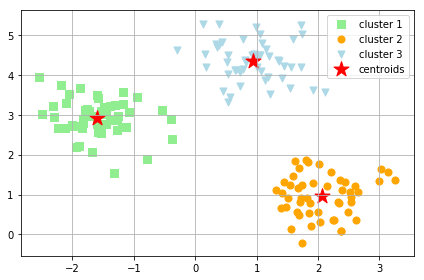

In [13]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete') # complete, average, ward
labels = ac.fit_predict(X)
#print('Cluster labels: %s' % labels)

y_km = ac.fit_predict(X)
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Locating regions of high density via DBSCAN

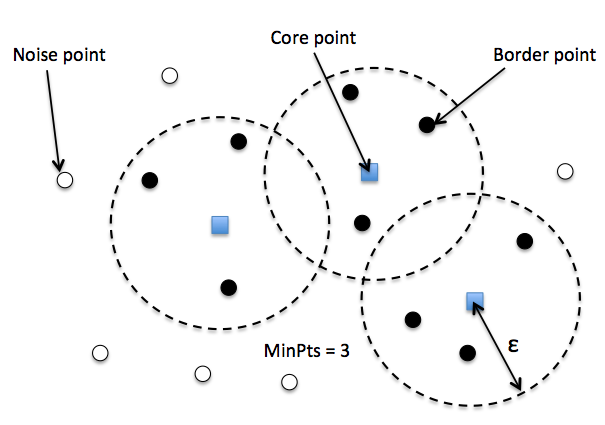

In [14]:
Image(filename='./images/11_11.png', width=500) 

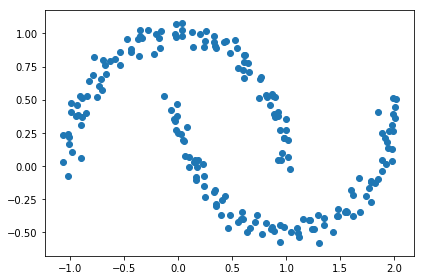

In [15]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
# plt.savefig('./figures/moons.png', dpi=300)
plt.show()

## K-means and hierarchical clustering:

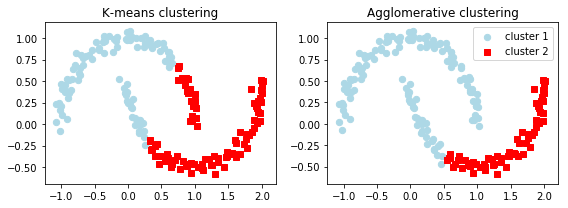

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

#######
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='average')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

## Density-based clustering:

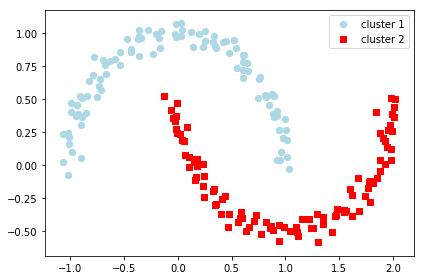

In [17]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

# Principal Component Analysis (PCA)

- Unsupervised linear transformation, mostly used for:
    - dimensionality reduction
    - data de-noising
    - data visualization
    

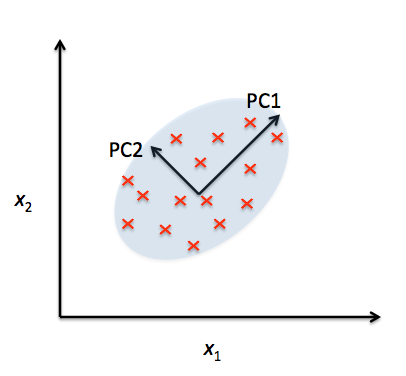

In [18]:
Image(filename='./images/05_01.png', width=500) 

- PCA aims to find the **orthogonal** directions of **maximum variance** in the feature speace
- PCA projects the original data points onto a new subspace with equal of fewer dimensions than the original space
   - $x_1$ and $x_2$: original feature axes
   - PC1 and PC2: principal components

$$
      z^{(i)} = v_1 x^{(i)}_1 + \dots + v_n x^{(i)}_n
$$

$$
      z = Xv \in \mathbb{R}^m
$$

Variance:
$$
      \max_{v \in \mathbb{R}^n} \;\; \frac{1}{m} \sum_{i=1}^m (z^{(i)} - \mu_z)^2
$$

$$
      \max_{v \in \mathbb{R}^n} \;\; \frac{1}{m} z^Tz
$$

$$
      \max_{v \in \mathbb{R}^n} \;\; \frac{1}{m} (Xv)^T(Xv) = \frac{1}{m} v^T X^T X v = v^T \Sigma v
$$

#### Rayleigh Quotient

For a symmetric matrix $\Sigma$, the Rayleigh quotient is defined as
$$
  R(\Sigma,v) := \frac{v^T \Sigma v}{v^T v}
$$

For the smallest and largest eigenvalues $\lambda_\min$ and $\lambda_\max$ of $\Sigma$, we can show that

$$
   \lambda_\min \le R(\Sigma, v) \le \lambda_\max
$$

where the minimum and the maximum are achieved by the eigenvectors corresponding to $\lambda_\min$ and $\lambda_\max$.

#### PC1

Using the fact about the Rayleigh quotient, we will set

$$
    z = Xv_\max, 
$$

where $v_\max$ is the eigenvector associated with $\lambda_\max$. Here, $v_\max$ is the first principal component (PC1), and $z$ contains the locations of $m$ points on the PC1.

#### PC2, PC3, ... PCk

PC2 should be the direction of the maximum variance, excluding the variance already explained by the PC1. Further, PC2 should be orthogonal to the PC1.

It turns out, that PC2, PC3, ..., PCk corresponds to the eigenvectors associated with the second largest, the third largest, ..., the $k$-th largest eigenvalues of $\Sigma$.


In [21]:
#import pandas as pd
#
#df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
#                      'machine-learning-databases/wine/wine.data',
#                      header=None)
#
#df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
#                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
#                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
#                   'Color intensity', 'Hue',
#                   'OD280/OD315 of diluted wines', 'Proline']
#
#df_wine.head()

from sklearn import datasets
wine = datasets.load_wine()
X = wine.data
y = wine.target

Splitting the data into 70% training and 30% test subsets.

In [22]:
from sklearn.model_selection import train_test_split

#X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

Standardizing the data.

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

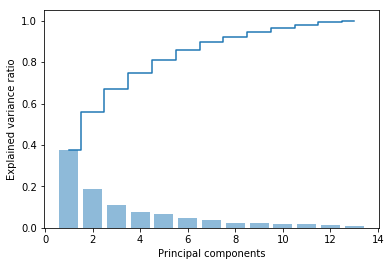

In [25]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [26]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

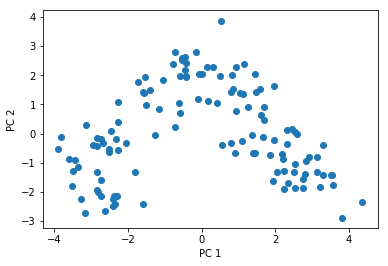

In [27]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()